# Get the data from github nlp-with-transformers repository

In [1]:
%%capture
!pip install huggingface-hub
!pip install transformers[torch]
!pip install accelerate -U
!pip install datasets
!pip install faiss-gpu
!pip install scikit-multilearn
!pip install nlpaug

In [2]:
#hide
import time
import math
import requests
from pathlib import Path
import pandas as pd
from tqdm.auto import tqdm

def fetch_issues(owner="huggingface", repo="transformers", num_issues=10_000,
                 rate_limit=5_000):
    batch = []
    all_issues = []
    per_page = 100 # Number of issues to return per page
    num_pages = math.ceil(num_issues / per_page)
    base_url = "https://api.github.com/repos"

    for page in tqdm(range(num_pages)):
        # Query with state=all to get both open and closed issues
        query = f"issues?page={page}&per_page={per_page}&state=all"
        issues = requests.get(f"{base_url}/{owner}/{repo}/{query}")
        batch.extend(issues.json())

        if len(batch) > rate_limit and len(all_issues) < num_issues:
            all_issues.extend(batch)
            batch = [] # Flush batch for next time period
            print(f"Reached GitHub rate limit. Sleeping for one hour ...")
            time.sleep(60 * 60 + 1)

    all_issues.extend(batch)
    df = pd.DataFrame.from_records(all_issues)
    return df

In [3]:
repo="transformers"
# df = fetch_issues()
# df.to_json(f"github-issues-{repo}.jsonl", orient="records", lines=True)

In [4]:
import pandas as pd

dataset_url = "https://git.io/nlp-with-transformers"
df_issues = pd.read_json(dataset_url, lines=True)
print(f"DataFrame shape: {df_issues.shape}")

DataFrame shape: (9930, 26)


In [4]:
df_issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app,pull_request
0,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849568459,MDU6SXNzdWU4NDk1Njg0NTk=,11046,Potential incorrect application of layer norm ...,...,NaN,0,2021-04-03 03:37:32,2021-04-03 03:37:32,NaT,NONE,None,"In BlenderbotSmallDecoder, layer norm is appl...",NaN,None
1,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849544374,MDU6SXNzdWU4NDk1NDQzNzQ=,11045,Multi-GPU seq2seq example evaluation significa...,...,NaN,0,2021-04-03 00:52:24,2021-04-03 00:52:24,NaT,NONE,None,\r\n### Who can help\r\n@patil-suraj @sgugger ...,NaN,None
2,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849529761,MDU6SXNzdWU4NDk1Mjk3NjE=,11044,[DeepSpeed] ZeRO stage 3 integration: getting ...,...,NaN,0,2021-04-02 23:40:42,2021-04-03 00:00:18,NaT,COLLABORATOR,None,"**[This is not yet alive, preparing for the re...",NaN,None
3,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849499734,MDU6SXNzdWU4NDk0OTk3MzQ=,11043,Can't load model to estimater,...,NaN,0,2021-04-02 21:51:44,2021-04-02 21:51:44,NaT,NONE,None,I was trying to follow the Sagemaker instructi...,NaN,None
4,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849274362,MDU6SXNzdWU4NDkyNzQzNjI=,11042,[LXMERT] Unclear what img_tensorize does with ...,...,NaN,0,2021-04-02 15:12:57,2021-04-02 15:15:07,NaT,NONE,None,## Environment info\r\n\r\n- `transformers` ve...,NaN,None


In [5]:
cols = ["url", "id", "title", "user", "labels", "state", "created_at", "body"]
df_issues.loc[2, cols].to_frame()

,2
url,https://api.github.com/repos/huggingface/trans...
id,849529761
title,[DeepSpeed] ZeRO stage 3 integration: getting ...
user,"{'login': 'stas00', 'id': 10676103, 'node_id':..."
labels,"[{'id': 2659267025, 'node_id': 'MDU6TGFiZWwyNj..."
state,open
created_at,2021-04-02 23:40:42
body,"**[This is not yet alive, preparing for the re..."


### Use only the label names from the label metadata field

In [6]:
df_issues["labels"] = (df_issues["labels"]
                       .apply(lambda x: [meta["name"] for meta in x]))
df_issues[["labels"]].head()

,labels
0,[]
1,[]
2,[DeepSpeed]
3,[]
4,[]


#### Find the number of labels per issue  

In [7]:
df_issues["num_labels"] = df_issues["labels"].apply(lambda x: len(x))

In [8]:
df_issues[["num_labels"]].head()

,num_labels
0,0
1,0
2,1
3,0
4,0


In [9]:
df_issues[["num_labels"]].value_counts(normalize=True).to_frame().T

num_labels,0,1,2,3,4,5
0,0.64854,0.307855,0.030715,0.01007,0.002518,0.000302


94% of the data is having 0 or 1 label only

#### Explore the most frequent labels

In [8]:
df_counts = df_issues["labels"].explode().value_counts()
print(f"Number of labels: {len(df_counts)}")
# Display the top-8 label categories
df_counts.to_frame().head(8).T

Number of labels: 65


,wontfix,model card,Core: Tokenization,New model,Core: Modeling,Help wanted,Good First Issue,Usage
labels,2284,649,106,98,64,52,50,46


#### Select only a subset of labels

In [9]:
label_map = {"Core: Tokenization": "tokenization",
             "New model": "new model",
             "Core: Modeling": "model training",
             "Usage": "usage",
             "Core: Pipeline": "pipeline",
             "TensorFlow": "tensorflow or tf",
             "PyTorch": "pytorch",
             "Examples": "examples",
             "Documentation": "documentation"}

def filter_labels(x):
    return [label_map[label] for label in x if label in label_map]

df_issues["labels"] = df_issues["labels"].apply(filter_labels)
all_labels = list(label_map.values())

In [10]:
df_counts = df_issues["labels"].explode().value_counts()
df_counts.to_frame().T

,tokenization,new model,model training,usage,pipeline,tensorflow or tf,pytorch,documentation,examples
labels,106,98,64,46,42,41,37,28,24


#### Labelled vs Unlabelled

In [11]:
df_issues["split"] = "unlabeled"
mask = df_issues["labels"].apply(lambda x: len(x)) > 0
df_issues.loc[mask, "split"] = "labeled"

In [10]:
df_issues["split"].value_counts().to_frame()

,split
unlabeled,9489
labeled,441


#### Sample example

In [15]:
for column in ["title", "body", "labels"]:
    print(f"{column}: {df_issues[column].iloc[26][:500]}\n")

title: Add new CANINE model

body: # 🌟 New model addition

## Model description

Google recently proposed a new **C**haracter **A**rchitecture with **N**o tokenization **I**n **N**eural **E**ncoders architecture (CANINE). Not only the title is exciting:

> Pipelined NLP systems have largely been superseded by end-to-end neural modeling, yet nearly all commonly-used models still require an explicit tokenization step. While recent tokenization approaches based on data-derived subword lexicons are less brittle than manually en

labels: ['new model']



#### Title and body both are important from the above example

In [12]:
df_issues["text"] = (df_issues
                     .apply(lambda x: x["title"] + "\n\n" + x["body"], axis=1))

#### Check and delete duplicates

In [13]:
len_before = len(df_issues)
df_issues = df_issues.drop_duplicates(subset="text")
print(f"Removed {(len_before-len(df_issues))/len_before:.2%} duplicates.")

Removed 1.88% duplicates.


#### Check wordlength in each piece of text

In [14]:
import numpy as np
import matplotlib.pyplot as plt

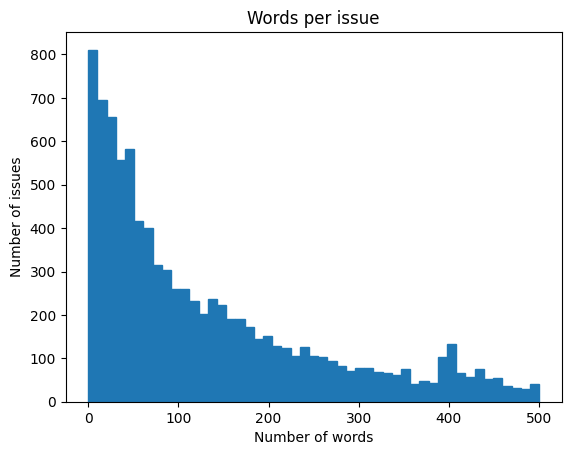

In [18]:
(df_issues["text"].str.split().apply(len)
 .hist(bins=np.linspace(0, 500, 50), grid=False, edgecolor="C0"))
plt.title("Words per issue")
plt.xlabel("Number of words")
plt.ylabel("Number of issues")
plt.show()

### Define the training set and validation set

#### The issiese had multiple labels and hence this needs to be incorporated. Scikit Learn modules to handle the data splitting for multilabel scenario

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import iterative_train_test_split

In [16]:
mlb = MultiLabelBinarizer()
mlb.fit([all_labels])
mlb.transform([["tokenization", "new model"], ["pytorch"]])

array([[0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [17]:
def balanced_split(df, test_size=0.5):
    ind = np.expand_dims(np.arange(len(df)), axis=1)
    labels = mlb.transform(df["labels"])
    ind_train, _, ind_test, _ = iterative_train_test_split(ind, labels,
                                                           test_size)
    return df.iloc[ind_train[:, 0]], df.iloc[ind_test[:,0]]

##### Split the data into supervised and unsupervised datasets, and then create balanced training, validation, and test sets for the supervised part

In [18]:
from sklearn.model_selection import train_test_split

df_clean = df_issues[["text", "labels", "split"]].reset_index(drop=True).copy()
df_unsup = df_clean.loc[df_clean["split"] == "unlabeled", ["text", "labels"]]
df_sup = df_clean.loc[df_clean["split"] == "labeled", ["text", "labels"]]

np.random.seed(0)
df_train, df_tmp = balanced_split(df_sup, test_size=0.5)
df_valid, df_test = balanced_split(df_tmp, test_size=0.5)

### Create the DatasetDict

In [19]:
from datasets import Dataset, DatasetDict

ds = DatasetDict({
    "train": Dataset.from_pandas(df_train.reset_index(drop=True)),
    "valid": Dataset.from_pandas(df_valid.reset_index(drop=True)),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True)),
    "unsup": Dataset.from_pandas(df_unsup.reset_index(drop=True))})

### Create some training slices so that we can evaluate the performance of each classifier as a function of the training set size

In [20]:
np.random.seed(0)
all_indices = np.expand_dims(list(range(len(ds["train"]))), axis=1)
indices_pool = all_indices
labels = mlb.transform(ds["train"]["labels"])
train_samples = [8, 16, 32, 64, 128]
train_slices, last_k = [], 0

for i, k in enumerate(train_samples):
    # Split off samples necessary to fill the gap to the next split size
    indices_pool, labels, new_slice, _ = iterative_train_test_split(
        indices_pool, labels, (k-last_k)/len(labels))
    last_k = k
    if i==0: train_slices.append(new_slice)
    else: train_slices.append(np.concatenate((train_slices[-1], new_slice)))

# Add full dataset as last slice
train_slices.append(all_indices), train_samples.append(len(ds["train"]))
train_slices = [np.squeeze(train_slice) for train_slice in train_slices]

In [21]:
print("Target split sizes:")
print(train_samples)
print("Actual split sizes:")
print([len(x) for x in train_slices])


Target split sizes:
[8, 16, 32, 64, 128, 223]
Actual split sizes:
[10, 19, 36, 68, 134, 223]


## Implement a baseline method with Naive Bayes algorithm

In [22]:
def prepare_labels(batch):
    batch["label_ids"] = mlb.transform(batch["labels"])
    return batch

In [23]:
ds = ds.map(prepare_labels, batched=True)

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

####  defaultdict with a list to store the scores per split

We will evaluate micro and macro f1 scores

In [24]:
from collections import defaultdict

macro_scores, micro_scores = defaultdict(list), defaultdict(list)

There's no ready module to train naive bayes for multilabel classification. Instead we will convert the problem into OvA (one vs All)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
for train_slice in train_slices:
    # Get training slice and test data, encode the labels
    ds_train_sample = ds["train"].select(train_slice)
    y_train = np.array(ds_train_sample["label_ids"])
    y_test = np.array(ds["test"]["label_ids"])
    # Use a simple count vectorizer to encode our texts as token counts
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(ds_train_sample["text"])
    X_test_counts = count_vect.transform(ds["test"]["text"])
    # Create and train our model!
    classifier = BinaryRelevance(classifier=MultinomialNB())
    classifier.fit(X_train_counts, y_train)
    # Generate predictions and evaluate
    y_pred_test = classifier.predict(X_test_counts)
    clf_report = classification_report(
        y_test, y_pred_test, target_names=mlb.classes_, zero_division=0,
        output_dict=True)
    # Store metrics
    macro_scores["Naive Bayes"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Naive Bayes"].append(clf_report["micro avg"]["f1-score"])

First, we get the training slice and encode the labels.

Then we use a count vectorizer to encode the texts by simply creating a vector of the size of the vocabulary where each entry corresponds to the frequency with which a token appeared in the text. This is called a bag-of-words approach, since all information on the order of the words is lost.

Then we train the classifier and use the predictions on the test set to get the micro and macro F1-scores via the classification report.

In [27]:
import matplotlib.pyplot as plt

def plot_metrics(micro_scores, macro_scores, sample_sizes, current_model):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    for run in micro_scores.keys():
        if run == current_model:
            ax0.plot(sample_sizes, micro_scores[run], label=run, linewidth=2)
            ax1.plot(sample_sizes, macro_scores[run], label=run, linewidth=2)
        else:
            ax0.plot(sample_sizes, micro_scores[run], label=run,
                     linestyle="dashed")
            ax1.plot(sample_sizes, macro_scores[run], label=run,
                     linestyle="dashed")

    ax0.set_title("Micro F1 scores")
    ax1.set_title("Macro F1 scores")
    ax0.set_ylabel("Test set F1 score")
    ax0.legend(loc="lower right")
    for ax in [ax0, ax1]:
        ax.set_xlabel("Number of training samples")
        ax.set_xscale("log")
        ax.set_xticks(sample_sizes)
        ax.set_xticklabels(sample_sizes)
        ax.minorticks_off()
    plt.tight_layout()
    plt.show()


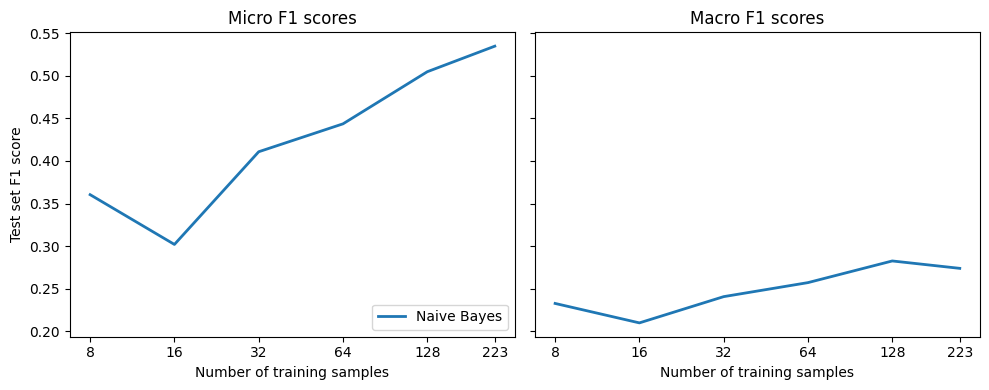

In [85]:
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes")

In [87]:
len(train_samples), micro_scores

(6,
 defaultdict(list,
             {'Naive Bayes': [0.3604651162790698,
               0.30208333333333337,
               0.41081081081081083,
               0.4435483870967742,
               0.5046728971962616,
               0.5346534653465347]}))

We can see the trend of improving f1 scores with increasing number of samples for both the metrics.

This has given us a good baseline to compare against transformer based methods

## Zero Shot classification - working with no labels

The goal of zero-shot classification is to make use of a pretrained model without any additional fine-tuning on your task-specific corpus.

Sample fill-mask example using BERT

In [28]:
from transformers import pipeline

In [29]:
pipe = pipeline("fill-mask", model="bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Find the label or type of the movie given the movie description

In [30]:
movie_desc = "The main characters of the movie madacascar \
are a lion, a zebra, a giraffe, and a hippo. "
prompt = "The movie is about [MASK]."

In [31]:
output = pipe(movie_desc + prompt)
for element in output:
    print(f"Token {element['token_str']}:\t{element['score']:.3f}%")

Token animals:	0.103%
Token lions:	0.066%
Token birds:	0.025%
Token love:	0.015%
Token hunting:	0.013%


Find the probability for some given tokens only

In [32]:
output = pipe(movie_desc + prompt, targets=["animals", "cars"])
for element in output:
    print(f"Token {element['token_str']}:\t{element['score']:.3f}%")

Token animals:	0.103%
Token cars:	0.001%


Change the movie description about vehicles

In [33]:
movie_desc = "In the movie transformers aliens \
can morph into a wide range of vehicles."

output = pipe(movie_desc + prompt, targets=["animals", "cars"])


In [34]:
output

[{'score': 0.13870137929916382,
  'token': 3765,
  'token_str': 'cars',
  'sequence': 'in the movie transformers aliens can morph into a wide range of vehicles. the movie is about cars.'},
 {'score': 0.005620089825242758,
  'token': 4176,
  'token_str': 'animals',
  'sequence': 'in the movie transformers aliens can morph into a wide range of vehicles. the movie is about animals.'}]

In [35]:
for element in output:
    print(f"Token {element['token_str']}:\t{element['score']:.3f}%")

Token cars:	0.139%
Token animals:	0.006%


The abvove examples illustrates the significance of zero-shot learning.   

 The above trials were on a pretrained model but now we will see the same on fine-tuned models on text classification

Transformers has an MNLI model for zero-shot classification built in.

In [36]:
pipe = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [37]:
sample = ds["train"][0]
print(f"Labels: {sample['labels']}")
output = pipe(sample["text"], all_labels, multi_label=True)
print(output["sequence"][:400])
print("\nPredictions:")

for label, score in zip(output["labels"], output["scores"]):
    print(f"{label}, {score:.2f}")

Labels: ['new model']
Add new CANINE model

# 🌟 New model addition

## Model description

Google recently proposed a new **C**haracter **A**rchitecture with **N**o tokenization **I**n **N**eural **E**ncoders architecture (CANINE). Not only the title is exciting:

> Pipelined NLP systems have largely been superseded by end-to-end neural modeling, yet nearly all commonly-used models still require an explicit tokeni

Predictions:
new model, 0.98
tensorflow or tf, 0.37
examples, 0.34
usage, 0.30
pytorch, 0.25
documentation, 0.25
model training, 0.24
tokenization, 0.17
pipeline, 0.16


 An important aspect for zero-shot classification is the domain we’re operating in. The texts we are dealing with here are very technical and mostly about coding, which makes them quite different from the original text distribution in the MNLI dataset. Thus, it is not surprising that this is a challenging task for the model; it might work much better for some domains than others, depending on how close they are to the training data.

In [38]:
def zero_shot_pipeline(example):
    output = pipe(example["text"], all_labels, multi_label=True)
    example["predicted_labels"] = output["labels"]
    example["scores"] = output["scores"]
    return example

In [39]:
ds_zero_shot = ds["valid"].map(zero_shot_pipeline)

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [67]:
ds_zero_shot[0]

{'text': 'Implementing efficient self attention in T5\n\n# 🌟 New model addition\r\n\r\nMy teammates and I (including @ice-americano) would like to use efficient self attention methods such as Linformer, Performer and Nystromformer\r\n\r\n## Model description\r\n\r\nThese new methods serve as approximations of regular attention, but reduce complexity from quadratic in the inputs to linear.  We would like to add a parameter to T5 where users can specify an efficient attention method to use instead of regular attention.  Ideally, this would be implemented across all models, but the models tend to have varying implementations of attention, rendering this generalization fairly tedious.\r\n\r\n## Open source status\r\n\r\n* [x] the model implementation is available: repos are https://github.com/mlpen and https://github.com/lucidrains/performer-pytorch\r\n* [ ] the model weights are available: N/A\r\n* [x] who are the authors: @mlpen and @lucidrains\r\n',
 'labels': ['new model'],
 'label_ids

Assign labels to each sample according to either top-k or threshold method

In [40]:
def get_preds(example, threshold=None, topk=None):
    preds = []
    if threshold:
        for label, score in zip(example["predicted_labels"], example["scores"]):
            if score >= threshold:
                preds.append(label)
    elif topk:
        for i in range(topk):
            preds.append(example["predicted_labels"][i])
    else:
        raise ValueError("Set either `threshold` or `topk`.")
    return {"pred_label_ids": list(np.squeeze(mlb.transform([preds])))}

In [41]:
def get_clf_report(ds):
    y_true = np.array(ds["label_ids"])
    y_pred = np.array(ds["pred_label_ids"])
    return classification_report(
        y_true, y_pred, target_names=mlb.classes_, zero_division=0,
        output_dict=True)

In [42]:
macros, micros = [], []
topks = [1, 2, 3, 4]
for topk in topks:
    ds_zero_shot = ds_zero_shot.map(get_preds, batched=False,
                                    fn_kwargs={'topk': topk})
    clf_report = get_clf_report(ds_zero_shot)
    micros.append(clf_report['micro avg']['f1-score'])
    macros.append(clf_report['macro avg']['f1-score'])

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

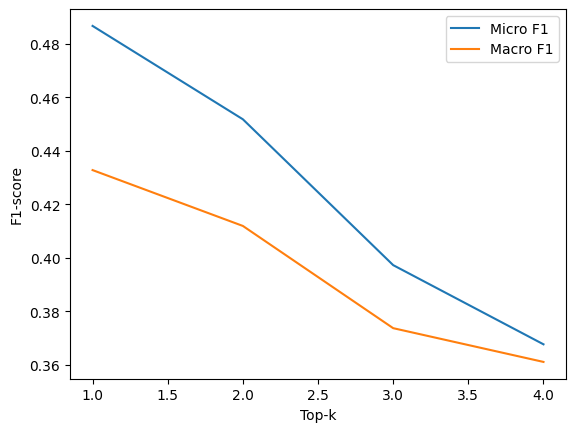

In [53]:
plt.plot(topks, micros, label='Micro F1')
plt.plot(topks, macros, label='Macro F1')
plt.xlabel("Top-k")
plt.ylabel("F1-score")
plt.legend(loc='best')
plt.show()

best results are obtained by selecting the label with the highest score per example (top 1)

Threshold method

In [43]:
macros, micros = [], []
thresholds = np.linspace(0.01, 1, 100)
for threshold in thresholds:
    ds_zero_shot = ds_zero_shot.map(get_preds,
                                    fn_kwargs={"threshold": threshold})
    clf_report = get_clf_report(ds_zero_shot)
    micros.append(clf_report["micro avg"]["f1-score"])
    macros.append(clf_report["macro avg"]["f1-score"])

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

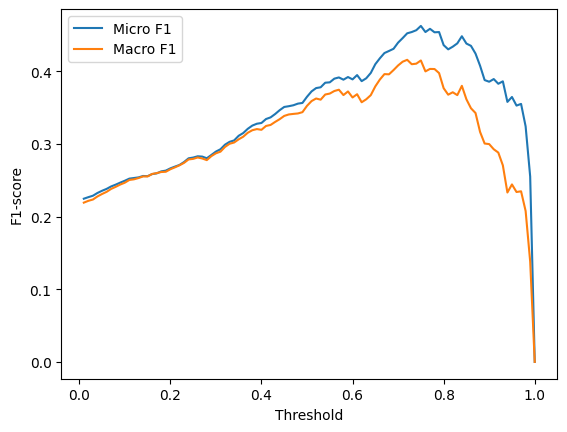

In [55]:
plt.plot(thresholds, micros, label="Micro F1")
plt.plot(thresholds, macros, label="Macro F1")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.legend(loc="best")
plt.show()

In [44]:
best_t, best_micro = thresholds[np.argmax(micros)], np.max(micros)
print(f'Best threshold (micro): {best_t} with F1-score {best_micro:.2f}.')
best_t, best_macro = thresholds[np.argmax(macros)], np.max(macros)
print(f'Best threshold (micro): {best_t} with F1-score {best_macro:.2f}.')

Best threshold (micro): 0.75 with F1-score 0.46.
Best threshold (micro): 0.72 with F1-score 0.42.


Precision recall trade off is visible with the threshold approach

#### Zero shot classification report on test dataset

In [45]:
ds_zero_shot = ds['test'].map(zero_shot_pipeline)
ds_zero_shot = ds_zero_shot.map(get_preds, fn_kwargs={'topk': 1})

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Map:   0%|          | 0/111 [00:00<?, ? examples/s]

In [46]:
clf_report = get_clf_report(ds_zero_shot)
for train_slice in train_slices:
    macro_scores['Zero Shot'].append(clf_report['macro avg']['f1-score'])
    micro_scores['Zero Shot'].append(clf_report['micro avg']['f1-score'])

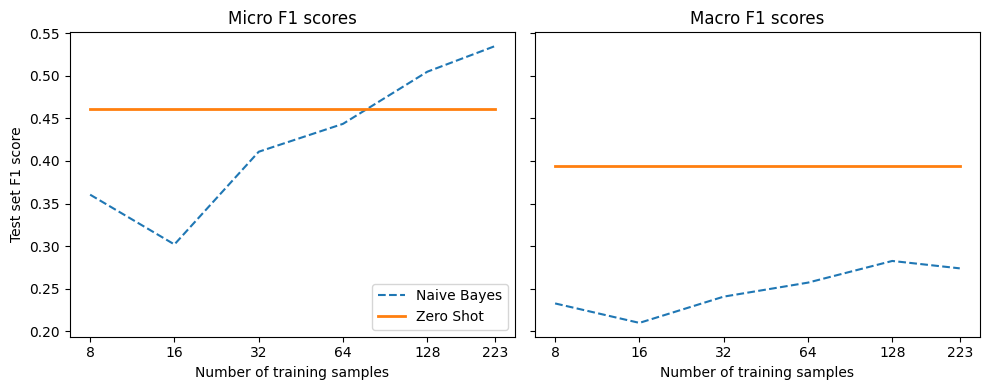

In [91]:
plot_metrics(micro_scores, macro_scores, train_samples, "Zero Shot")

For Naive Bayes case, the training was done for different training slices so the f1 score is trending

but **for zero shot classification, there was no training done** so, there is no question of training slices

With Zero Shot classificaiton, we did not adapt the parameters of the model with the data; instead, we just adapted some hyperparameters

## Working with a few labels

### Data Augmentation

In [47]:
from transformers import set_seed
import nlpaug.augmenter.word as naw

In [48]:

set_seed(3)
aug = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased",
                                device="cuda", action="substitute")

text = "Transformers are the most popular toys"
print(f"Original text: {text}")
print(f"Augmented text: {aug.augment(text)}")

Original text: Transformers are the most popular toys
Augmented text: ['transformers produce the most famous toys']


In [49]:
def augment_text(batch, transformations_per_example=1):
    text_aug, label_ids = [], []
    for text, labels in zip(batch["text"], batch["label_ids"]):
      text_aug += [text]
      label_ids += [labels]
      # print(len(text_aug))
      for _ in range(transformations_per_example):
        gen_text = aug.augment(text)
        # print(type(gen_text), len(gen_text))
        text_aug += gen_text
        label_ids += [labels]
    return {"text": text_aug, "label_ids": label_ids}

In [50]:
for train_slice in train_slices:
    # Get training slice and test data, encode the labels
    ds_train_sample = ds["train"].select(train_slice)
    # DATA AUGMENTATION
    ds_train_sample = ds_train_sample.map(augment_text, batched=True,
    remove_columns=ds_train_sample.column_names).shuffle(seed=42)

    y_train = np.array(ds_train_sample["label_ids"])
    y_test = np.array(ds["test"]["label_ids"])
    # Use a simple count vectorizer to encode our texts as token counts
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(ds_train_sample["text"])
    X_test_counts = count_vect.transform(ds["test"]["text"])
    # Create and train our model!
    classifier = BinaryRelevance(classifier=MultinomialNB())
    classifier.fit(X_train_counts, y_train)
    # Generate predictions and evaluate
    y_pred_test = classifier.predict(X_test_counts)
    clf_report = classification_report(
        y_test, y_pred_test, target_names=mlb.classes_, zero_division=0,
        output_dict=True)
    # Store metrics
    macro_scores["Naive Bayes + Aug"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Naive Bayes + Aug"].append(clf_report["micro avg"]["f1-score"])

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/19 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/68 [00:00<?, ? examples/s]

Map:   0%|          | 0/134 [00:00<?, ? examples/s]

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

In [34]:

# macro_scores = defaultdict(list,
#             {'Naive Bayes': [0.23288166214995487,
#               0.21006897585844955,
#               0.24086240556828795,
#               0.25730500818220114,
#               0.28271105113210376,
#               0.27403710305671086],
#              'Zero Shot': [0.39372541039207704,
#               0.39372541039207704,
#               0.39372541039207704,
#               0.39372541039207704,
#               0.39372541039207704,
#               0.39372541039207704],
#              'Naive Bayes + Aug': [0.23720314999384773,
#               0.2532531036772818,
#               0.3023107769058323,
#               0.28171298642313136,
#               0.3105849087273236,
#               0.389302442994057]})

In [35]:
# micro_scores = defaultdict(list,
#             {'Naive Bayes': [0.3604651162790698,
#               0.30208333333333337,
#               0.41081081081081083,
#               0.4435483870967742,
#               0.5046728971962616,
#               0.5346534653465347],
#              'Zero Shot': [0.4615384615384615,
#               0.4615384615384615,
#               0.4615384615384615,
#               0.4615384615384615,
#               0.4615384615384615,
#               0.4615384615384615],
#              'Naive Bayes + Aug': [0.3707865168539326,
#               0.39805825242718446,
#               0.4771573604060914,
#               0.45353159851301117,
#               0.5,
#               0.56]})

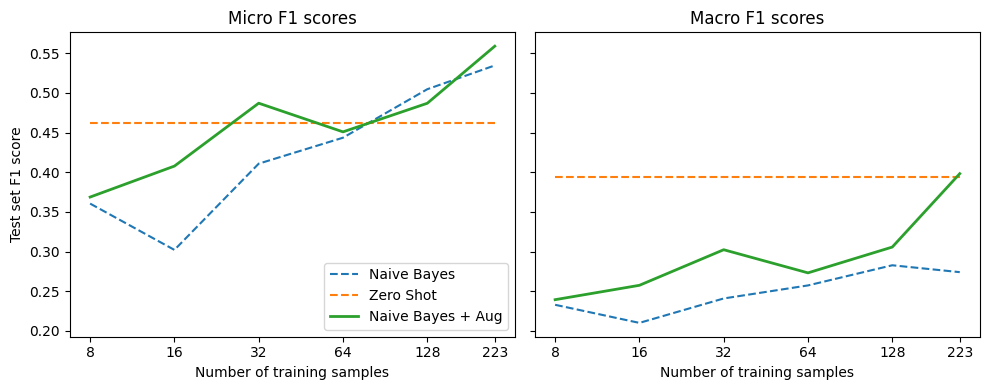

In [51]:
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes + Aug")

With data augmentation, Naive bayes beats the zero shot classification with over 170 examples

### Using Embeddings as a lookup table

Use the language model to embed all labeled texts.
Perform a nearest neighbor search over the stored embeddings.
Aggregate the labels of the nearest neighbors to get a prediction

1.   Use the language model to embed all labeled texts.
2.   Perform a nearest neighbor search over the stored embeddings.
3.   Aggregate the labels of the nearest neighbors to get a prediction




##### Load a GPT-2 tokenizer and model, define the mean pooling operation, and wrap the whole process in a simple embed_text() function

In [52]:
import torch
from transformers import AutoTokenizer, AutoModel

In [53]:
model_ckpt = "miguelvictor/python-gpt2-large"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)

#### Line by line execution to understand the function mean_pooling() and embed_text() defined below

In [41]:
sample = ds["train"][0]
sample

{'text': "Add new CANINE model\n\n# 🌟 New model addition\r\n\r\n## Model description\r\n\r\nGoogle recently proposed a new **C**haracter **A**rchitecture with **N**o tokenization **I**n **N**eural **E**ncoders architecture (CANINE). Not only the title is exciting:\r\n\r\n> Pipelined NLP systems have largely been superseded by end-to-end neural modeling, yet nearly all commonly-used models still require an explicit tokenization step. While recent tokenization approaches based on data-derived subword lexicons are less brittle than manually engineered tokenizers, these techniques are not equally suited to all languages, and the use of any fixed vocabulary may limit a model's ability to adapt. In this paper, we present CANINE, a neural encoder that operates directly on character sequences, without explicit tokenization or vocabulary, and a pre-training strategy that operates either directly on characters or optionally uses subwords as a soft inductive bias. To use its finer-grained input e

In [57]:
len(sample['text'])

2064

In [43]:
tokenizer.pad_token = tokenizer.eos_token


In [44]:
inputs = tokenizer(sample["text"], padding=True, truncation=True,
                   max_length=128, return_tensors="pt")
inputs

{'input_ids': tensor([[ 4550,   649, 15628,  8881,  2746,   198,   198,     2, 12520,   234,
           253,   968,  2746,  3090,   201,   198,   201,   198,  2235,  9104,
          6764,   201,   198,   201,   198, 11708,  2904,  5150,   257,   649,
         12429,    34,  1174,  9869,  7321, 12429,    32,  1174,    81,   354,
          5712,   495,   351, 12429,    45,  1174,    78, 11241,  1634, 12429,
            40,  1174,    77, 12429,    45,  1174,    68,  1523, 12429,    36,
          1174, 10782,   375,   364, 10959,   357, 44565,  8881,   737,  1892,
           691,   262,  3670,   318,  7895,    25,   201,   198,   201,   198,
            29, 25149,   417,  1389,   399, 19930,  3341,   423,  5688,   587,
         22754, 15395,   416,   886,    12,  1462,    12,   437, 17019, 21128,
            11,  1865,  3016,   477,  8811,    12,  1484,  4981,   991,  2421,
           281,  7952, 11241,  1634,  2239,    13,  2893,  2274, 11241,  1634,
         10581,  1912,   319,  1366,  

In [56]:
inputs["input_ids"].shape

torch.Size([1, 128])

In [49]:
with torch.no_grad():
  model_output = model(**inputs)
type(model_output)

transformers.modeling_outputs.BaseModelOutputWithPastAndCrossAttentions

In [52]:
token_embeddings = model_output[0]
token_embeddings.shape

torch.Size([1, 128, 1280])

In [53]:
token_embeddings.size()

torch.Size([1, 128, 1280])

In [54]:
inputs["attention_mask"].shape

torch.Size([1, 128])

In [55]:
input_mask_expanded = (inputs["attention_mask"]
                       .unsqueeze(-1)
                       .expand(token_embeddings.size())
                       .float())
input_mask_expanded,input_mask_expanded.shape

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 torch.Size([1, 128, 1280]))

In [58]:
sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
sum_embeddings.shape

torch.Size([1, 1280])

In [60]:
input_mask_expanded.sum(1)

tensor([[128., 128., 128.,  ..., 128., 128., 128.]])

In [61]:
sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
sum_mask

tensor([[128., 128., 128.,  ..., 128., 128., 128.]])

In [62]:

sum_embeddings

tensor([[ -2.6559,  -5.9979, -24.9606,  ...,  31.8617, -37.8896, -94.3214]])

In [63]:
sum_embeddings / sum_mask


tensor([[-0.0207, -0.0469, -0.1950,  ...,  0.2489, -0.2960, -0.7369]])

In [54]:
def mean_pooling(model_output, attention_mask):
    # Extract the token embeddings
    token_embeddings = model_output[0]
    # print(token_embeddings.shape)
    # Compute the attention mask
    input_mask_expanded = (attention_mask
                           .unsqueeze(-1)
                           .expand(token_embeddings.size())
                           .float())
    # Sum the embeddings, but ignore masked tokens
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    # Return the average as a single vector
    return sum_embeddings / sum_mask

def embed_text(examples):
    inputs = tokenizer(examples["text"], padding=True, truncation=True,
                       max_length=128, return_tensors="pt")
    with torch.no_grad():
        model_output = model(**inputs)
    pooled_embeds = mean_pooling(model_output, inputs["attention_mask"])
    return {"embedding": pooled_embeds.cpu().numpy()}

GPT-style models don’t have a padding token, use eos token for that purpose

In [55]:
tokenizer.pad_token = tokenizer.eos_token
embs_train = ds["train"].map(embed_text, batched=True, batch_size=16)
embs_valid = ds["valid"].map(embed_text, batched=True, batch_size=16)
embs_test = ds["test"].map(embed_text, batched=True, batch_size=16)

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([15, 128, 1280])


Map:   0%|          | 0/106 [00:00<?, ? examples/s]

torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([10, 128, 1280])


Map:   0%|          | 0/111 [00:00<?, ? examples/s]

torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([16, 128, 1280])
torch.Size([15, 128, 1280])


we have all the embeddings, we need to set up a system to search them

we can use a built-in structure of Datasets called a FAISS index

think of FAISS as a search engine for embeddings

In [56]:
embs_train.add_faiss_index("embedding")

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['text', 'labels', 'label_ids', 'embedding'],
    num_rows: 223
})

In [57]:
i, k = 0, 3 # Select the first query and 3 nearest neighbors
rn, nl = "\r\n\r\n", "\n" # Used to remove newlines in text for compact display

query =  np.array(embs_valid[i]["embedding"], dtype=np.float32)
scores, samples = embs_train.get_nearest_examples("embedding", query, k=k)

print(f"QUERY LABELS: {embs_valid[i]['labels']}")
print(f"QUERY TEXT:\n{embs_valid[i]['text'][:200].replace(rn, nl)} [...]\n")
print("="*50)
print(f"Retrieved documents:")
for score, label, text in zip(scores, samples["labels"], samples["text"]):
    print("="*50)
    print(f"TEXT:\n{text[:200].replace(rn, nl)} [...]")
    print(f"SCORE: {score:.2f}")
    print(f"LABELS: {label}")

QUERY LABELS: ['new model']
QUERY TEXT:
Implementing efficient self attention in T5

# 🌟 New model addition
My teammates and I (including @ice-americano) would like to use efficient self attention methods such as Linformer, Performer and [...]

Retrieved documents:
TEXT:
Add Linformer model

# 🌟 New model addition
## Model description
### Linformer: Self-Attention with Linear Complexity
Paper published June 9th on ArXiv: https://arxiv.org/abs/2006.04768
La [...]
SCORE: 54.92
LABELS: ['new model']
TEXT:
Add FAVOR+ / Performer attention

# 🌟 FAVOR+ / Performer attention addition
Are there any plans to add this new attention approximation block to Transformers library?
## Model description
The n [...]
SCORE: 57.90
LABELS: ['new model']
TEXT:
Implement DeLighT: Very Deep and Light-weight Transformers

# 🌟 New model addition
## Model description
DeLight, that delivers similar or better performance than transformer-based models with sign [...]
SCORE: 60.12
LABELS: ['new model']


#### what is the best value for k which we choose as 3 above

Record the macro and micro performance for each setting so we can decide later which run performed best

In [58]:
def get_sample_preds(sample, m):
    return (np.sum(sample["label_ids"], axis=0) >= m).astype(int)

def find_best_k_m(ds_train, valid_queries, valid_labels, max_k=17):
    max_k = min(len(ds_train), max_k)
    perf_micro = np.zeros((max_k, max_k))
    perf_macro = np.zeros((max_k, max_k))
    for k in range(1, max_k):
        for m in range(1, k + 1):
            _, samples = ds_train.get_nearest_examples_batch("embedding",
                                                             valid_queries, k=k)
            y_pred = np.array([get_sample_preds(s, m) for s in samples])
            clf_report = classification_report(valid_labels, y_pred,
                target_names=mlb.classes_, zero_division=0, output_dict=True)
            perf_micro[k, m] = clf_report["micro avg"]["f1-score"]
            perf_macro[k, m] = clf_report["macro avg"]["f1-score"]
    return perf_micro, perf_macro

check what the best values would be with all the training samples and visualize the scores for all k and m configurations

In [59]:
valid_labels = np.array(embs_valid["label_ids"])
valid_queries = np.array(embs_valid["embedding"], dtype=np.float32)
perf_micro, perf_macro = find_best_k_m(embs_train, valid_queries, valid_labels)

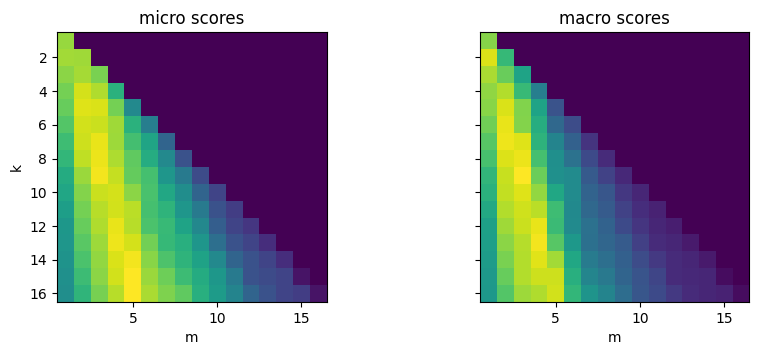

In [41]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
ax0.imshow(perf_micro)
ax1.imshow(perf_macro)

ax0.set_title("micro scores")
ax0.set_ylabel("k")
ax1.set_title("macro scores")
for ax in [ax0, ax1]:
    ax.set_xlim([0.5, 17 - 0.5])
    ax.set_ylim([17 - 0.5, 0.5])
    ax.set_xlabel("m")
plt.show()

In [60]:
k, m = np.unravel_index(perf_micro.argmax(), perf_micro.shape)
print(f"Best k: {k}, best m: {m}")

Best k: 15, best m: 5


When we retrieve the 15 nearest neighbors and then assign the labels that occurred at least 5 times

Find the best value of k

In [61]:
embs_train.drop_index("embedding")
test_labels = np.array(embs_test["label_ids"])
test_queries = np.array(embs_test["embedding"], dtype=np.float32)

for train_slice in train_slices:
    # Create a Faiss index from training slice
    embs_train_tmp = embs_train.select(train_slice)
    embs_train_tmp.add_faiss_index("embedding")
    # Get best k, m values with validation set
    perf_micro, _ = find_best_k_m(embs_train_tmp, valid_queries, valid_labels)
    k, m = np.unravel_index(perf_micro.argmax(), perf_micro.shape)
    # Get predictions on test set
    _, samples = embs_train_tmp.get_nearest_examples_batch("embedding",
                                                           test_queries,
                                                           k=int(k))
    y_pred = np.array([get_sample_preds(s, m) for s in samples])
    # Evaluate predictions
    clf_report = classification_report(test_labels, y_pred,
        target_names=mlb.classes_, zero_division=0, output_dict=True,)
    macro_scores["Embedding"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Embedding"].append(clf_report["micro avg"]["f1-score"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

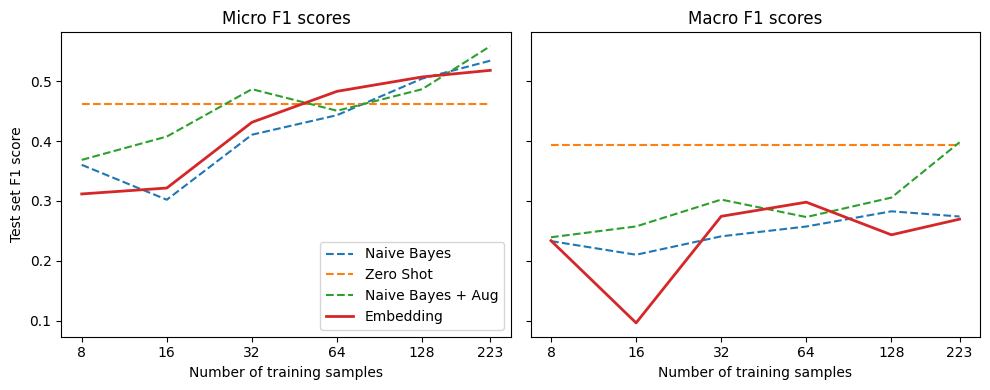

In [62]:
plot_metrics(micro_scores, macro_scores, train_samples, "Embedding")

The embedding lookup is competitive on the micro scores with the previous approaches while just having two “learnable” parameters, k and m, but performs slightly worse on the macro scores.

## Fine tuning a vanilla transformer

Starting with the BERT(which was trained on Wiki)

Steps followed here:

1. Loading the pretrained tokenizer,
2. Tokenizing our dataset, and
3. Getting rid of the columns we don’t need for training and evaluation

In [63]:
import torch
from transformers import (AutoTokenizer, AutoConfig,
                          AutoModelForSequenceClassification)

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, max_length=128)
ds_enc = ds.map(tokenize, batched=True)
ds_enc = ds_enc.remove_columns(['labels', 'text'])

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

The multilabel loss function expects the labels to be of type float, since it also allows for class probabilities instead of discrete labels. Therefore, we need to change the type of the column label_ids

In [64]:
ds_enc.set_format("torch")
ds_enc = ds_enc.map(lambda x: {"label_ids_f": x["label_ids"].to(torch.float)},
                    remove_columns=["label_ids"])
ds_enc = ds_enc.rename_column("label_ids_f", "label_ids")

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

we are likely to quickly overfit the training data due to its limited size, we set **load_best_model_at_end**=True and choose the best model based on the micro F1-⁠score

In [65]:
from transformers import Trainer, TrainingArguments

training_args_fine_tune = TrainingArguments(
    output_dir="./results", num_train_epochs=20, learning_rate=3e-5,
    lr_scheduler_type='constant', per_device_train_batch_size=4,
    per_device_eval_batch_size=32, weight_decay=0.0,
    evaluation_strategy="epoch", save_strategy="epoch",logging_strategy="epoch",
    load_best_model_at_end=True, metric_for_best_model='micro f1',
    save_total_limit=1, log_level='error')

F1 score function required during training and evaluation

In [66]:
from scipy.special import expit as sigmoid

def compute_metrics(pred):
    y_true = pred.label_ids
    y_pred = sigmoid(pred.predictions)
    y_pred = (y_pred>0.5).astype(float)

    clf_dict = classification_report(y_true, y_pred, target_names=all_labels,
                                     zero_division=0, output_dict=True)
    return {"micro f1": clf_dict["micro avg"]["f1-score"],
            "macro f1": clf_dict["macro avg"]["f1-score"]}

For each training set slice we train a classifier from scratch, load the best model at the end of the training loop, and store the results on the test set

In [67]:
config = AutoConfig.from_pretrained(model_ckpt)
config.num_labels = len(all_labels)
config.problem_type = "multi_label_classification"
for train_slice in train_slices:
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                               config=config)
    trainer = Trainer(
        model=model, tokenizer=tokenizer,
        args=training_args_fine_tune,
        compute_metrics=compute_metrics,
        train_dataset=ds_enc["train"].select(train_slice),
        eval_dataset=ds_enc["valid"],)

    trainer.train()
    pred = trainer.predict(ds_enc["test"])
    metrics = compute_metrics(pred)
    macro_scores["Fine-tune (vanilla)"].append(metrics["macro f1"])
    micro_scores["Fine-tune (vanilla)"].append(metrics["micro f1"])


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.691400,0.654292,0.113111,0.054416
2,0.628100,0.593594,0.060241,0.029393
3,0.578300,0.551765,0.055556,0.035292
4,0.512100,0.497766,0.000000,0.000000
5,0.485600,0.475363,0.000000,0.000000
6,0.448800,0.452073,0.000000,0.000000
7,0.429200,0.436627,0.000000,0.000000
8,0.409300,0.409941,0.000000,0.000000
9,0.380800,0.398416,0.000000,0.000000
10,0.359100,0.390859,0.000000,0.000000


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.589300,0.544099,0.031008,0.026144
2,0.494500,0.480992,0.000000,0.000000
3,0.451100,0.438851,0.000000,0.000000
4,0.400100,0.411882,0.000000,0.000000
5,0.380000,0.393649,0.000000,0.000000
6,0.357800,0.378935,0.000000,0.000000
7,0.334200,0.372293,0.000000,0.000000
8,0.318300,0.366307,0.000000,0.000000
9,0.299600,0.364235,0.000000,0.000000
10,0.289800,0.358724,0.000000,0.000000


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.575700,0.495152,0.000000,0.000000
2,0.449100,0.422628,0.000000,0.000000
3,0.388200,0.386573,0.000000,0.000000
4,0.349400,0.368232,0.000000,0.000000
5,0.328800,0.362357,0.000000,0.000000
6,0.309500,0.355223,0.000000,0.000000
7,0.293100,0.347476,0.000000,0.000000
8,0.272300,0.340662,0.016529,0.008889
9,0.249000,0.335036,0.204380,0.091228
10,0.228000,0.332761,0.125000,0.060536


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.523600,0.427614,0.000000,0.000000
2,0.387600,0.374874,0.000000,0.000000
3,0.351700,0.357410,0.000000,0.000000
4,0.326100,0.346275,0.000000,0.000000
5,0.303300,0.333712,0.139535,0.060606
6,0.274200,0.322374,0.125000,0.058116
7,0.245200,0.302373,0.384106,0.155237
8,0.219400,0.292008,0.472050,0.183662
9,0.190700,0.285870,0.450000,0.175818
10,0.170100,0.269051,0.466258,0.200673


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.458200,0.373132,0.000000,0.000000
2,0.353000,0.350063,0.000000,0.000000
3,0.324600,0.323705,0.269504,0.093827
4,0.286400,0.300550,0.466258,0.180398
5,0.249600,0.283022,0.488095,0.185185
6,0.222500,0.263757,0.511628,0.190152
7,0.193900,0.260280,0.479042,0.251399
8,0.158000,0.235239,0.550562,0.281873
9,0.128900,0.229255,0.618785,0.422176
10,0.111000,0.217678,0.579545,0.338866


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.415500,0.357361,0.000000,0.000000
2,0.335700,0.321494,0.138462,0.058824
3,0.291300,0.289187,0.473373,0.177778
4,0.246700,0.252275,0.508876,0.226838
5,0.207900,0.231430,0.566474,0.288566
6,0.169200,0.209596,0.582857,0.351852
7,0.142400,0.209813,0.592179,0.309723
8,0.112400,0.198506,0.638298,0.406904
9,0.085700,0.192572,0.666667,0.549146
10,0.065600,0.181804,0.696970,0.574548


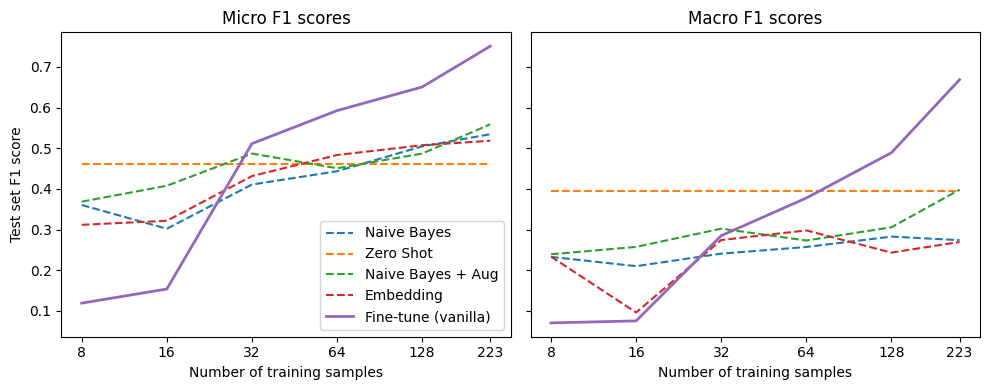

In [68]:
plot_metrics(micro_scores, macro_scores, train_samples, "Fine-tune (vanilla)")

### Leveraging unlabeled data

We will first fine tune a (pretrained) BERT model with mask language modeling on the unlabeled dataset. This is done to adapt the model to our dataset.

NOTE that we are not trying to build another BERT model and hence we won't change parameters after predicting the masked token,i.e. we don’t train the model to also predict these tokens

For this reason we mask them from the loss, and we can get a mask when tokenizing by setting **return_special_tokens_mask**=True

#### Retokenization

In [69]:
def tokenize(batch):
    return tokenizer(batch["text"], truncation=True,
                     max_length=128, return_special_tokens_mask=True)

ds_mlm = ds.map(tokenize, batched=True)
ds_mlm = ds_mlm.remove_columns(["labels", "text", "label_ids"])

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

We can either keep two copies of the dataset, one with the mask and other with the masked token shown in the labelled set. But this creates two copies.

Remember that the data collator is the function that builds the bridge between the dataset and the model calls.

we can use it to do the masking and label generation on the fly

In [70]:
from transformers import DataCollatorForLanguageModeling, set_seed

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer,
                                                mlm_probability=0.15)

In [71]:
set_seed(3)
data_collator.return_tensors = "np"
inputs = tokenizer("Transformers are awesome!", return_tensors="np")
outputs = data_collator([{"input_ids": inputs["input_ids"][0]}])

pd.DataFrame({
    "Original tokens": tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]),
    "Masked tokens": tokenizer.convert_ids_to_tokens(outputs["input_ids"][0]),
    "Original input_ids": inputs["input_ids"][0],
    "Masked input_ids": outputs["input_ids"][0],
    "Labels": outputs["labels"][0]}).T

,0,1,2,3,4,5
Original tokens,[CLS],transformers,are,awesome,!,[SEP]
Masked tokens,[CLS],transformers,are,awesome,[MASK],[SEP]
Original input_ids,101,19081,2024,12476,999,102
Masked input_ids,101,19081,2024,12476,103,102
Labels,-100,-100,-100,-100,999,-100


token corresponding to the exclamation mark has been replaced with a mask token. In addition, the data collator returned a label array, which is –100 for the original tokens and the token ID for the masked tokens. As we have seen previously, the entries containing –100 are ignored when calculating the loss.

In [72]:
data_collator.return_tensors = "pt"


In [75]:
from huggingface_hub import notebook_login

notebook_login()

In [76]:
from transformers import AutoModelForMaskedLM

training_args = TrainingArguments(
    output_dir = f"{model_ckpt}-issues-128", per_device_train_batch_size=32,
    logging_strategy="epoch", evaluation_strategy="epoch", save_strategy="no",
    num_train_epochs=16, push_to_hub=True, log_level="error", report_to="none")

trainer = Trainer(
        model=AutoModelForMaskedLM.from_pretrained("bert-base-uncased"),
        tokenizer=tokenizer, args=training_args, data_collator=data_collator,
        train_dataset=ds_mlm["unsup"], eval_dataset=ds_mlm["train"])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [77]:
trainer.train()

{'loss': 2.1115, 'learning_rate': 4.6875e-05, 'epoch': 1.0}
{'eval_loss': 1.690952181816101, 'eval_runtime': 1.9827, 'eval_samples_per_second': 112.472, 'eval_steps_per_second': 14.122, 'epoch': 1.0}
{'loss': 1.6344, 'learning_rate': 4.375e-05, 'epoch': 2.0}
{'eval_loss': 1.3645408153533936, 'eval_runtime': 2.0073, 'eval_samples_per_second': 111.096, 'eval_steps_per_second': 13.949, 'epoch': 2.0}
{'loss': 1.4807, 'learning_rate': 4.0625000000000005e-05, 'epoch': 3.0}
{'eval_loss': 1.4237514734268188, 'eval_runtime': 2.0012, 'eval_samples_per_second': 111.434, 'eval_steps_per_second': 13.992, 'epoch': 3.0}
{'loss': 1.3931, 'learning_rate': 3.7500000000000003e-05, 'epoch': 4.0}
{'eval_loss': 1.4296478033065796, 'eval_runtime': 2.0031, 'eval_samples_per_second': 111.325, 'eval_steps_per_second': 13.978, 'epoch': 4.0}
{'loss': 1.3413, 'learning_rate': 3.4375e-05, 'epoch': 5.0}
{'eval_loss': 1.2653725147247314, 'eval_runtime': 2.0092, 'eval_samples_per_second': 110.991, 'eval_steps_per_seco

TrainOutput(global_step=4656, training_loss=1.2845363879121865, metrics={'train_runtime': 3790.4109, 'train_samples_per_second': 39.27, 'train_steps_per_second': 1.228, 'train_loss': 1.2845363879121865, 'epoch': 16.0})

In [78]:
trainer.push_to_hub("Training complete!")

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

'https://huggingface.co/pradeepiisc/bert-base-uncased-issues-128/tree/main/'

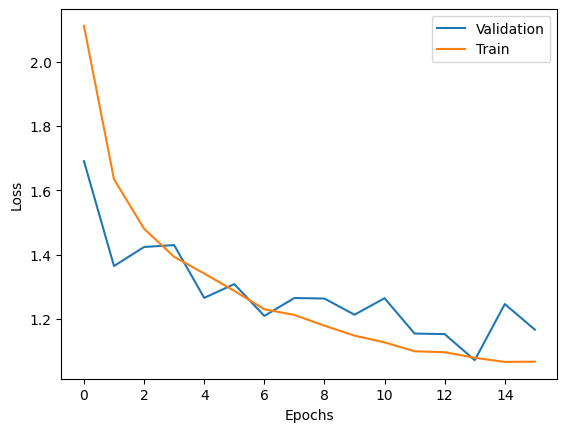

In [79]:
df_log = pd.DataFrame(trainer.state.log_history)

(df_log.dropna(subset=["eval_loss"]).reset_index()["eval_loss"]
 .plot(label="Validation"))
df_log.dropna(subset=["loss"]).reset_index()["loss"].plot(label="Train")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

## Fine tune a classifier based on the above model

In [ ]:
model_ckpt = f'{model_ckpt}-issues-128'
config = AutoConfig.from_pretrained(model_ckpt)
config.num_labels = len(all_labels)
config.problem_type = "multi_label_classification"

for train_slice in train_slices:
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                               config=config)
    trainer = Trainer(
        model=model,
        tokenizer=tokenizer,
        args=training_args_fine_tune,
        compute_metrics=compute_metrics,
        train_dataset=ds_enc["train"].select(train_slice),
        eval_dataset=ds_enc["valid"],
    )

    trainer.train()
    pred = trainer.predict(ds_enc['test'])
    metrics = compute_metrics(pred)
    # DA refers to domain adaptation
    macro_scores['Fine-tune (DA)'].append(metrics['macro f1'])
    micro_scores['Fine-tune (DA)'].append(metrics['micro f1'])

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased-issues-128 and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.641700,0.579450,0.000000,0.000000
2,0.535600,0.495636,0.000000,0.000000
3,0.451800,0.451102,0.000000,0.000000
4,0.400200,0.416715,0.000000,0.000000
5,0.361800,0.394062,0.000000,0.000000
6,0.338700,0.381390,0.000000,0.000000
7,0.318100,0.374632,0.000000,0.000000
8,0.298700,0.368791,0.000000,0.000000
9,0.278400,0.363898,0.000000,0.000000
10,0.264500,0.358215,0.000000,0.000000


Some weights of the model checkpoint at bert-base-uncased-issues-128 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncase

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.610600,0.501460,0.000000,0.000000
2,0.440500,0.421180,0.000000,0.000000
3,0.377300,0.387785,0.000000,0.000000
4,0.336600,0.371088,0.000000,0.000000
5,0.313800,0.360501,0.000000,0.000000
6,0.290400,0.350742,0.000000,0.000000
7,0.270500,0.344252,0.016529,0.008889
8,0.246700,0.342463,0.016529,0.008889
9,0.227300,0.337972,0.048780,0.039316
10,0.212300,0.331335,0.095238,0.060536


Some weights of the model checkpoint at bert-base-uncased-issues-128 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncase

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.553500,0.432792,0.000000,0.000000
2,0.385600,0.378370,0.000000,0.000000
3,0.339500,0.360370,0.000000,0.000000
4,0.305900,0.342573,0.016529,0.008889
5,0.279600,0.329915,0.125000,0.055556
6,0.251600,0.321911,0.195489,0.082011
7,0.225200,0.309611,0.258993,0.105556
8,0.197400,0.305217,0.293706,0.126126
9,0.176300,0.301840,0.310811,0.138889
10,0.155700,0.297134,0.328767,0.188752


Some weights of the model checkpoint at bert-base-uncased-issues-128 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncase

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.484400,0.381813,0.000000,0.000000
2,0.356800,0.347757,0.000000,0.000000
3,0.319500,0.324321,0.235294,0.088889
4,0.285200,0.305969,0.255319,0.093795
5,0.249200,0.286754,0.443038,0.174747
6,0.206100,0.263673,0.487805,0.237983
7,0.170100,0.259009,0.481928,0.251524
8,0.141100,0.242439,0.520710,0.285667
9,0.119900,0.234070,0.526316,0.289205
10,0.104300,0.239854,0.526316,0.294296


Some weights of the model checkpoint at bert-base-uncased-issues-128 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncase

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.419900,0.351698,0.000000,0.000000
2,0.324600,0.313893,0.291667,0.097222
3,0.276900,0.279453,0.293706,0.099291
4,0.222900,0.240428,0.526946,0.243165
5,0.175300,0.222333,0.560000,0.286322
6,0.134200,0.198008,0.634409,0.449312
7,0.103300,0.190467,0.652632,0.509116
8,0.082200,0.181521,0.659686,0.506630
9,0.065900,0.175701,0.696517,0.563352
10,0.055200,0.181871,0.673575,0.524032


Some weights of the model checkpoint at bert-base-uncased-issues-128 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncase

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.390400,0.319713,0.248175,0.092141
2,0.290700,0.254197,0.533333,0.270988
3,0.216600,0.205061,0.619565,0.349048


In [ ]:
plot_metrics(micro_scores, macro_scores, train_samples, "Fine-tune (DA)")

This highlights that domain adaptation can provide a slight boost to the model’s performance with unlabeled data and little effort.